# Steps

* Importing Libraries
* Importing the Datasets
* Data Cleaning, Data Exploration
* Data Manipulation 
* Data Visulisation
* EDA
* Splting Dataset
* choosing the dataset
* training the model
* testing the model
* model evalaution
* Export the dataset into .csv

Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,accuracy_score

Importing Dataset

In [2]:
df=pd.read_csv("train_salary.csv")

# problem Statement
 given a data set which captures salary from July 1st, 2013 through June 30th, 2014, It includes only those employess who are employed on June 30,2014.
   
   
    Predict the salary of employess working in Balitmore

In [3]:
df.head()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


    Data Cleaning

In [4]:
df.describe()

,Name,JobTitle,AgencyID,Agency,HireDate,AnnualSalary,GrossPay
count,18981,18981,18981,18981,18911,18981,15758
unique,18788,1075,1177,65,4737,1590,13732
top,"Battle,Daron J",AIDE BLUE CHIP,P04001,Youth Summer,05/21/2014,$11310.00,$1051.25
freq,2,4817,316,4323,1478,4811,848


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18981 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0    Name         18981 non-null  object
 1   JobTitle      18981 non-null  object
 2   AgencyID      18981 non-null  object
 3   Agency        18981 non-null  object
 4   HireDate      18911 non-null  object
 5   AnnualSalary  18981 non-null  object
 6   GrossPay      15758 non-null  object
dtypes: object(7)
memory usage: 1.0+ MB


* 18981 rows
* 7 columns
* all columns dtypes is object
* hiredate and gross pay has null values

In [6]:
df.isnull().sum()

 Name              0
JobTitle           0
AgencyID           0
Agency             0
HireDate          70
AnnualSalary       0
GrossPay        3223
dtype: int64

In [7]:
df.shape

(18981, 7)

In [8]:
df.columns

Index([' Name', 'JobTitle', 'AgencyID', 'Agency', 'HireDate', 'AnnualSalary',
       'GrossPay'],
      dtype='object')

* Removing the leading Spaces & traiiling spaces and converting all the columns to lowercase 

In [9]:
df.columns=map(str.lower,df.columns)

In [10]:
df=df.rename(columns=lambda x:x.strip())

In [11]:
df.columns

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hiredate', 'annualsalary',
       'grosspay'],
      dtype='object')

In [12]:
df.head()

,name,jobtitle,agencyid,agency,hiredate,annualsalary,grosspay
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,06/10/2013,$11310.00,$873.63
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,10/24/1979,$53428.00,$52868.38
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,09/25/2006,$68300.00,$67439.19
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,07/23/2009,$62000.00,$58654.74
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,07/24/2013,$43999.00,$39686.95


In [13]:
# cheking for null values in each colums
df.isna().sum()

name               0
jobtitle           0
agencyid           0
agency             0
hiredate          70
annualsalary       0
grosspay        3223
dtype: int64

* there are 70 null values in hiredate 
* 70/19881=0.0036879 less than 1% data 
* therefore we can drop null data in hiredate

In [14]:
df.dropna(subset=['hiredate'],inplace=True)

In [15]:
df.isna().sum()

name               0
jobtitle           0
agencyid           0
agency             0
hiredate           0
annualsalary       0
grosspay        3223
dtype: int64

* grosspay is dependent on Annual Salary 
* since grosspay is dependent and has null values we can drop it 

In [16]:
# deleting the colums Gross pay
df.drop('grosspay',axis=1,inplace=True)

In [17]:
df.isna().sum()

name            0
jobtitle        0
agencyid        0
agency          0
hiredate        0
annualsalary    0
dtype: int64

* Null values taken care of

In [18]:
df['agencyid'].value_counts()

P04001    316
C90786    276
W02629    193
P04002    191
A99416    166
         ... 
W02525      1
W02400      1
A64005      1
W02666      1
W02339      1
Name: agencyid, Length: 1177, dtype: int64

* there are 1177 agencies in balitmore.

In [19]:
df['agency'].value_counts()

Youth Summer                4323
Police Department           3141
Fire Department             1576
DPW-Water & Waste Water     1491
HLTH-Health Department       833
                            ... 
Council Services               6
HLTH-Health Dept Locatio       6
Legislative Reference          5
M-R Cable & Comm               4
Special City Services          4
Name: agency, Length: 65, dtype: int64

* against agency id we have only 65 agencies
* that implies an single agency has multiple agency id's which might be based on job roles

In [20]:
df[['agency','agencyid']].value_counts()

agency                   agencyid
R&P-Recreation (part-ti  P04001      316
TRANS-Crossing Guards    C90786      276
Youth Summer             W02629      193
R&P-Recreation (part-ti  P04002      191
Police Department        A99416      166
                                    ... 
Youth Summer             W02503        1
                         W02502        1
Youth Summer             W02676        1
                         W02678        1
R&P-Parks (wkly)         B68080        1
Length: 1177, dtype: int64

In [21]:
df[df['agencyid']=='C90786']

,name,jobtitle,agencyid,agency,hiredate,annualsalary
38,"Abual Gasim,Nada A",CROSSING GUARD,C90786,TRANS-Crossing Guards,11/22/2004,$10038.00
73,"Adams,Judith C",CROSSING GUARD,C90786,TRANS-Crossing Guards,06/02/1990,$10941.00
152,"Alark,Sandra P",CROSSING GUARD,C90786,TRANS-Crossing Guards,10/29/2009,$10038.00
201,"Ali,Amal A",CROSSING GUARD,C90786,TRANS-Crossing Guards,06/11/1994,$10941.00
253,"Allen,Teresa",CROSSING GUARD,C90786,TRANS-Crossing Guards,10/29/1998,$10640.00
...,...,...,...,...,...,...
18510,"Wilson,Kellie",CROSSING GUARD,C90786,TRANS-Crossing Guards,12/01/2010,$9891.00
18519,"Wilson,Misskay K",CROSSING GUARD,C90786,TRANS-Crossing Guards,05/17/2007,$10038.00
18673,"Woodard,Bridgette L",CROSSING GUARD,C90786,TRANS-Crossing Guards,10/23/2003,$10339.00
18690,"Woodland,Cynthia D",CROSSING GUARD,C90786,TRANS-Crossing Guards,11/02/2006,$10038.00


In [22]:
df['jobtitle'].value_counts()

AIDE BLUE CHIP                    4817
POLICE OFFICER                    1866
LABORER (Hourly)                   597
EMT Firefighter Suppression        358
CROSSING GUARD                     337
                                  ... 
PUBLIC INFORMATION OFFICER SAO       1
STREET MASON                         1
DESIGN PLANNER I                     1
FUEL SYSTEMS SPECIALIST              1
Research Analyst II                  1
Name: jobtitle, Length: 1073, dtype: int64

* there are 1073 unique jobs in bailtmore

* moving to next column Hiredate
* remove hiredate 
* make 3 new features  
* hireday hiremonth hire year 
* with datatyape as int 
* MM/DD/YYYY current format

In [23]:
df['hiredate'].iloc[0]
hire_day=[]
hire_month=[]
hire_year=[]

for i in range(len(df['hiredate'])):
    day=str(df['hiredate'].iloc[i]).split("/")
    hire_month.append(int(day[0]))
    hire_day.append(int(day[1]))
    hire_year.append(int(day[2]))


In [24]:
len(hire_day),len(hire_month),len(hire_year)

(18911, 18911, 18911)

In [25]:
df['hire_date']=hire_day
df['hire_month']=hire_month
df['hire_year']=hire_year

In [26]:
df.shape

(18911, 9)

In [27]:
df.isna().sum()

name            0
jobtitle        0
agencyid        0
agency          0
hiredate        0
annualsalary    0
hire_date       0
hire_month      0
hire_year       0
dtype: int64

In [28]:
x=df['annualsalary']

In [29]:
df.drop(['hiredate','annualsalary'],axis=1,inplace=True)

In [30]:
df['annualsalary']=x

In [31]:
df.head()

,name,jobtitle,agencyid,agency,hire_date,hire_month,hire_year,annualsalary
0,"Aaron,Keontae E",AIDE BLUE CHIP,W02200,Youth Summer,10,6,2013,$11310.00
1,"Aaron,Patricia G",Facilities/Office Services II,A03031,OED-Employment Dev,24,10,1979,$53428.00
2,"Aaron,Petra L",ASSISTANT STATE'S ATTORNEY,A29005,States Attorneys Office,25,9,2006,$68300.00
3,"Abaineh,Yohannes T",EPIDEMIOLOGIST,A65026,HLTH-Health Department,23,7,2009,$62000.00
4,"Abbene,Anthony M",POLICE OFFICER TRAINEE,A99416,Police Department,24,7,2013,$43999.00


In [32]:
df.shape

(18911, 8)

* moving to next column annual salary
* remove the "$" sign and change dtype to int

In [33]:
df['annualsalary']=df['annualsalary'].str.strip("$").astype('float').astype('int')

In [34]:
df['agency']=df['agency'].str.strip()

* Cheking for outlires in target variable

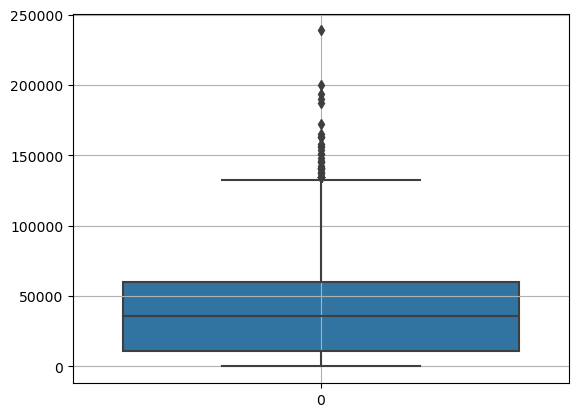

In [35]:
sns.boxplot(df['annualsalary'])
plt.grid()

* there are few salaryies which are very high from others
* they might affect prediction , we have to elimate thoes

In [36]:
df.annualsalary.describe()

count     18911.000000
mean      39660.421554
std       25163.466041
min           0.000000
25%       11310.000000
50%       36203.000000
75%       60300.000000
max      238772.000000
Name: annualsalary, dtype: float64

* max value is way more than other quartiels
* deleting rows which have anuual salary more than 150000 {from box plot}

In [37]:
df[df['annualsalary']>150000].count()

name            16
jobtitle        16
agencyid        16
agency          16
hire_date       16
hire_month      16
hire_year       16
annualsalary    16
dtype: int64

* only 16 rows which is 0.084% of data therefore we can delete these rows

In [38]:
df=df[df['annualsalary']<150000]

In [39]:
df.shape

(18895, 8)

In [40]:
# Creating box plot for annaul salary

<Axes: >

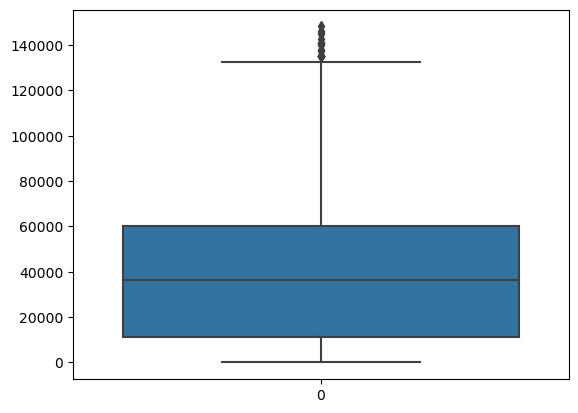

In [41]:
sns.boxplot(df['annualsalary'])

* all the datapoint above 75% are very close to each other therefore no change

        Exploratory Data Analysis

* checking distribution of Target Varibale

Text(0.5, 1.0, 'Annual Salary Dustribution Plot')

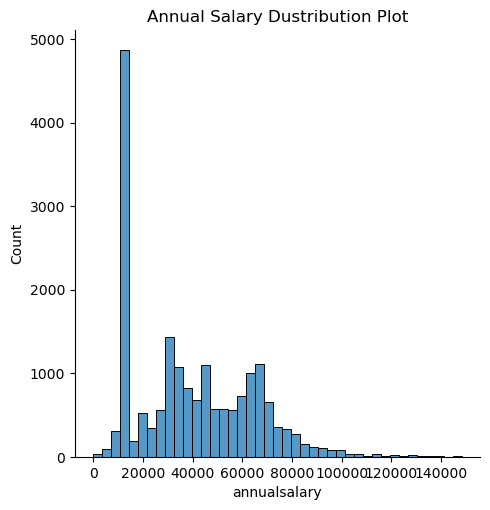

In [42]:
sns.displot(data=df['annualsalary'])
plt.title("Annual Salary Dustribution Plot")

* Data is Randomly distributed

In [43]:
# top 10 agency for with most hiring
job_agency=df['agency'].value_counts().nlargest(10).to_dict()

<Axes: xlabel='agency', ylabel='No. of Employess'>

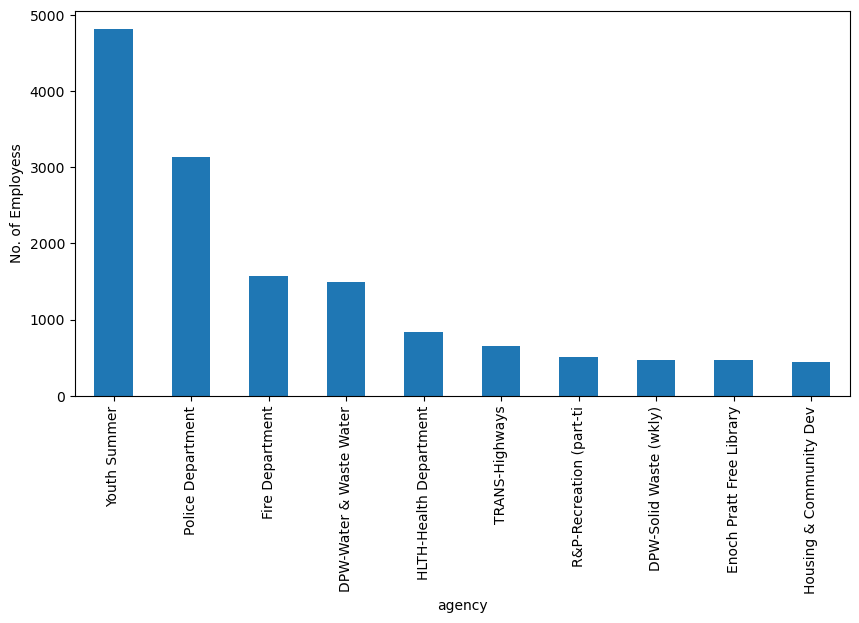

In [44]:
plt.figure(figsize=(10,5))
plt.ylabel('No. of Employess')
df.groupby(['agency'])['name'].count().sort_values(ascending=False).head(10).plot.bar()

In [45]:
df['jobtitle']=df['jobtitle'].str.strip()

In [46]:
jobs=dict(df['jobtitle'].value_counts().nlargest(10))
jobs

{'AIDE BLUE CHIP': 4817,
 'POLICE OFFICER': 1866,
 'LABORER (Hourly)': 597,
 'EMT Firefighter Suppression': 358,
 'CROSSING GUARD': 337,
 'COMMUNITY AIDE': 302,
 'RECREATION ARTS INSTRUCTOR': 299,
 'POLICE OFFICER (EID)': 250,
 'POLICE SERGEANT': 222,
 'MOTOR VEHICLE DRIVER I': 189}

Text(0, 0.5, 'count')

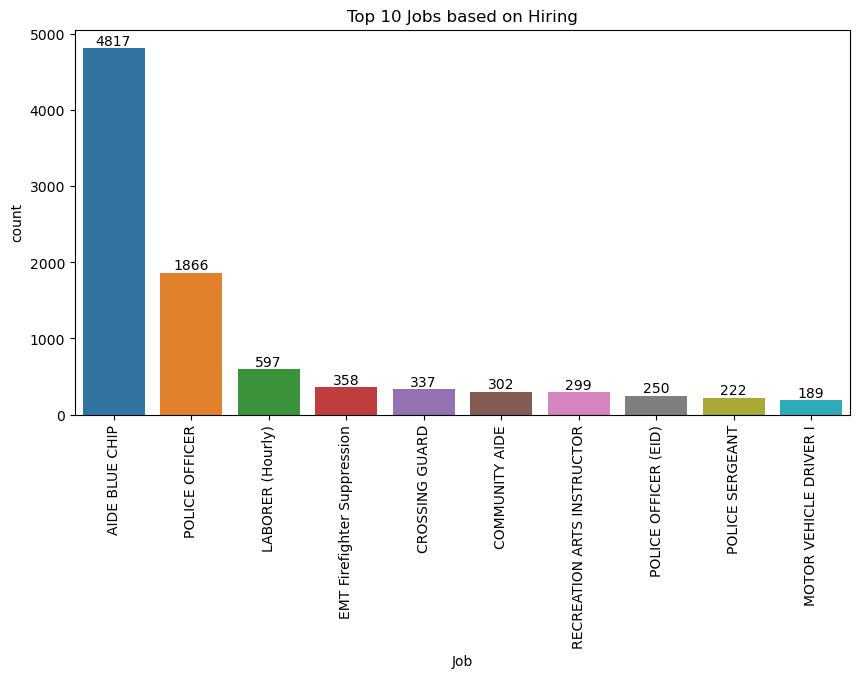

In [47]:
x=list(jobs.keys())
y=list(jobs.values())
plt.figure(figsize=(10,5))
graph=sns.barplot(x=x,y=y)
plt.xticks(rotation=90)
graph.bar_label(graph.containers[0])
plt.title("Top 10 Jobs based on Hiring")
plt.xlabel("Job")
plt.ylabel("count")

In [48]:
# plot top 10 jobs with the highest salary

Text(0.5, 1.0, 'Top 10 Highest paying Jobs')

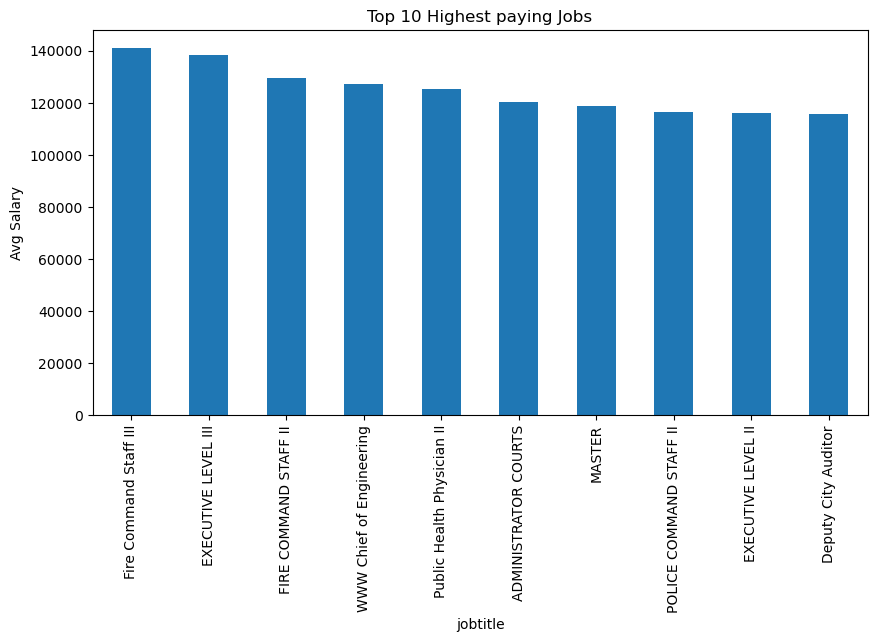

In [49]:
plt.figure(figsize=(10,5))
x=df.groupby(['jobtitle'])['annualsalary'].mean().sort_values(ascending=False).head(10).plot.bar()
plt.ylabel("Avg Salary")
plt.title("Top 10 Highest paying Jobs")

In [50]:
# plt top 10 agency's id who has highest number of job opening

Text(0, 0.5, 'No. Employess')

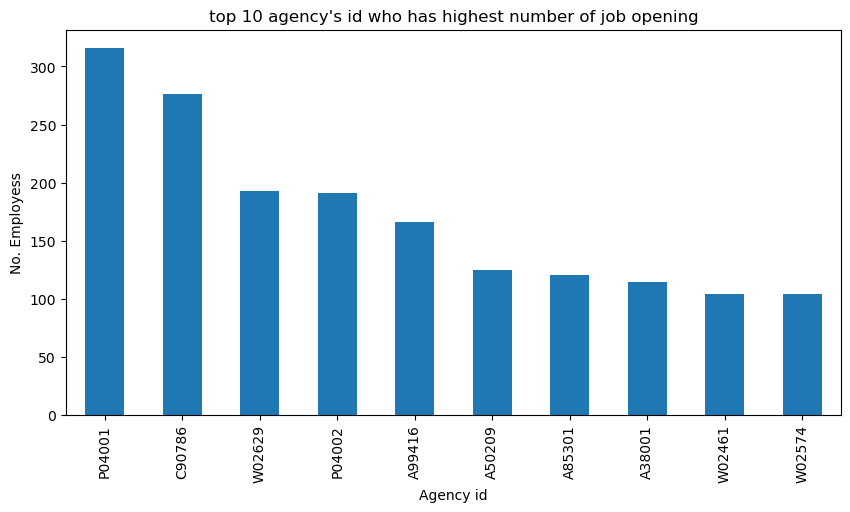

In [51]:
plt.figure(figsize=(10,5))
graph=df.agencyid.value_counts().head(10).plot.bar()
plt.title("top 10 agency's id who has highest number of job opening")
plt.xlabel("Agency id")
plt.ylabel("No. Employess")

Text(0.5, 1.0, 'highest salary v/s year graph')

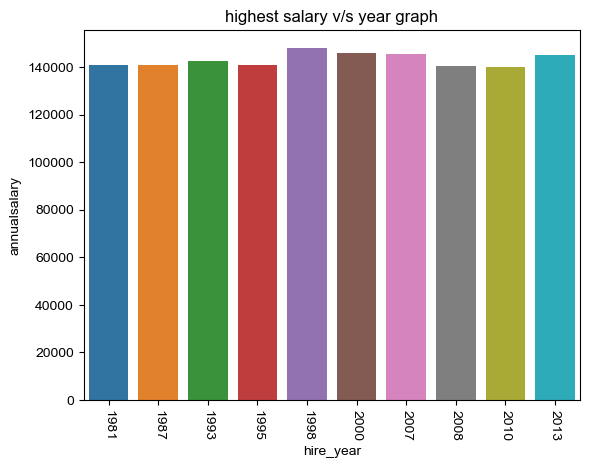

In [52]:
#  plot highest salary v/s year graph x=year, y=salary

year_salary=df[['hire_year','annualsalary']].sort_values(by='annualsalary',ascending=False).head(10)

x=year_salary['hire_year']
y=year_salary['annualsalary']
sns.barplot(x=x,y=y)
plt.xticks(rotation=-90)
sns.set(rc={'figure.figsize':(10,5)})
plt.title('highest salary v/s year graph')

Text(0, 0.5, 'Avg Salary')

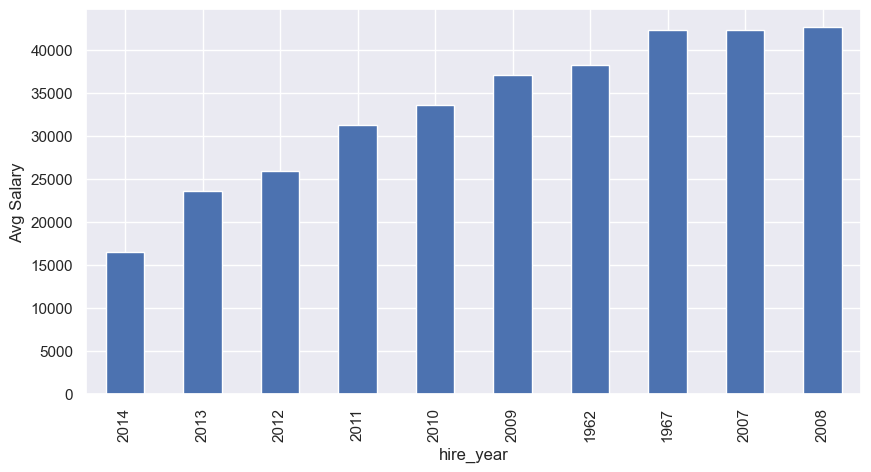

In [53]:
# plot Average Salary based on hire Year
plt.figure(figsize=(10,5))
df.groupby(['hire_year'])['annualsalary'].mean().sort_values(ascending=True).head(10).plot.bar()
plt.ylabel("Avg Salary")

Text(0, 0.5, 'Avg Salary')

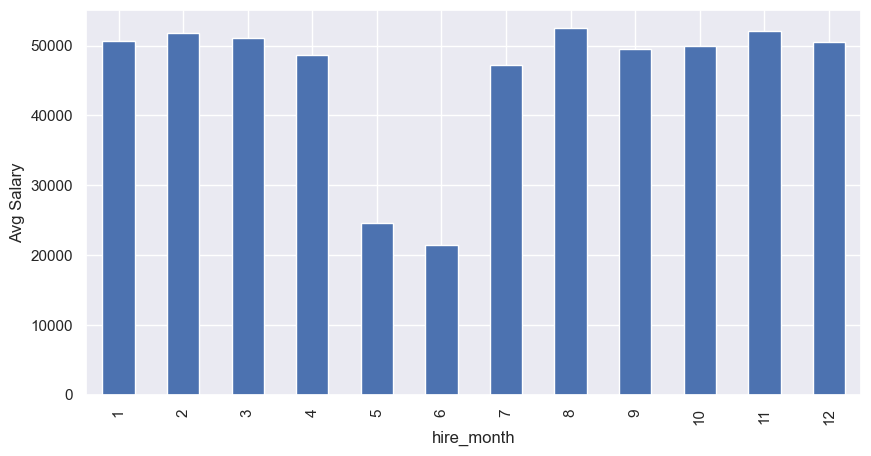

In [54]:
# plot Average Salary based on hire mont
plt.figure(figsize=(10,5))
df.groupby(['hire_month'])['annualsalary'].mean().plot.bar()
plt.ylabel("Avg Salary")

* low salry in month 5, 6

Text(0.5, 1.0, 'Most hiring month')

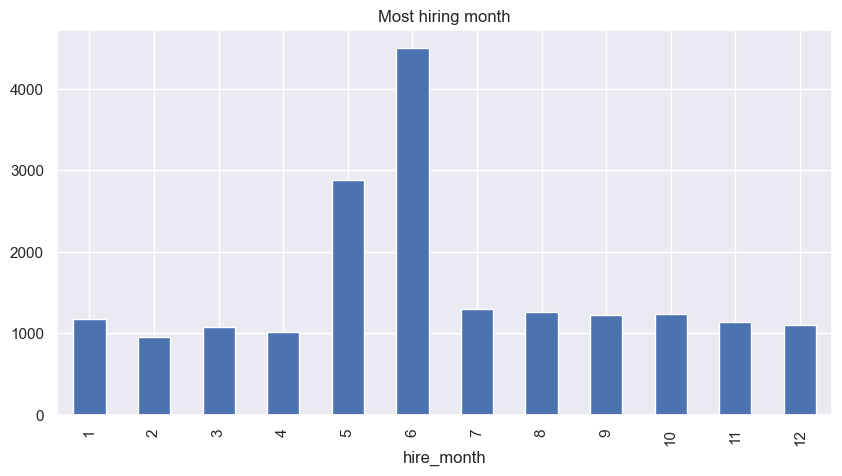

In [55]:
# plot a graph to check on which month most of the people are hired

hire_month_grp=df.groupby(df['hire_month']).jobtitle
hire_month_grp.count().plot.bar()
plt.title('Most hiring month')


* more people are hired in month 5,6 but with low salary

c:\Users\phing\anaconda3\Lib\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


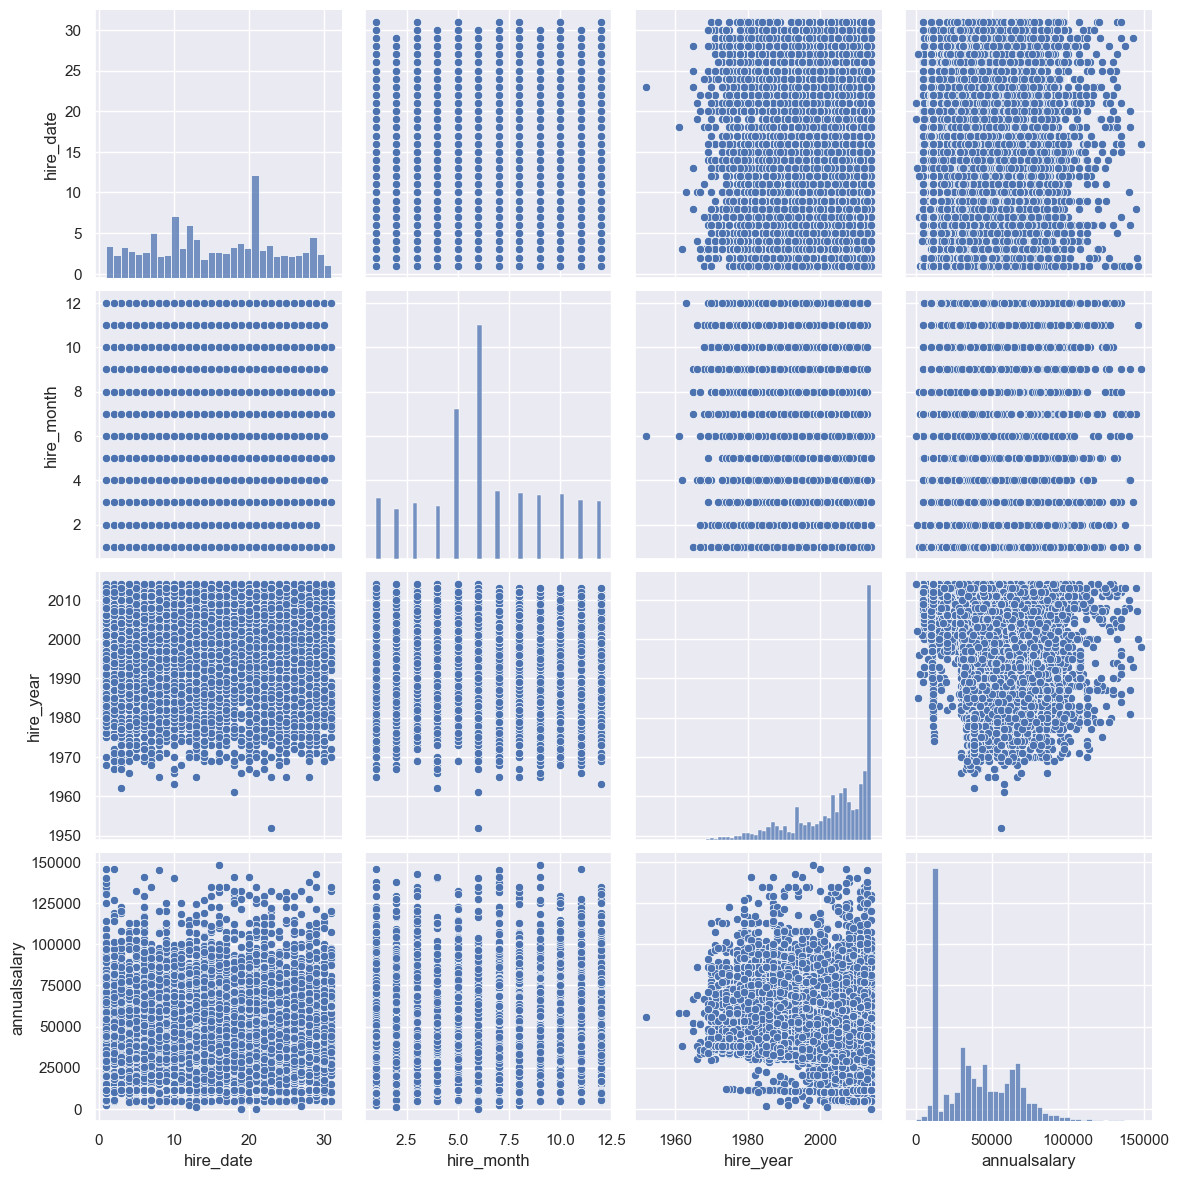

In [56]:
# plot a paiplot
sns.pairplot(df,size=3)

Visulize correlation

C:\Users\phing\AppData\Local\Temp\ipykernel_21160\1599126306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

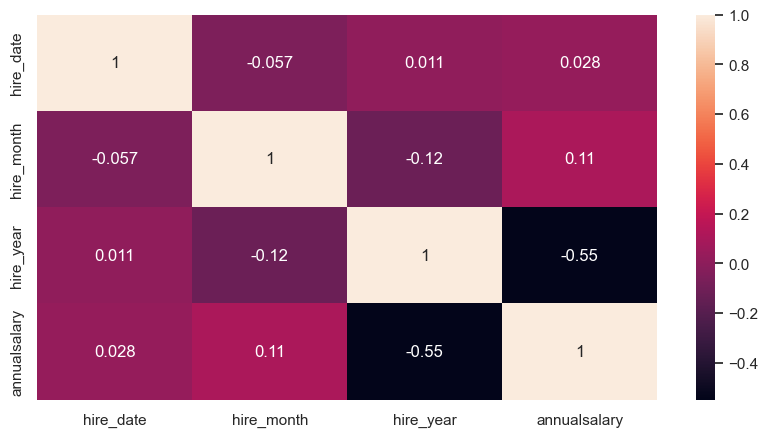

In [57]:
# plot a heatmap
sns.heatmap(df.corr(),annot=True)

* only hire_year shows some significant corelation with Annual Salary

    Feature Engineeing

In [58]:
new_df=df.copy()

In [59]:
new_df.keys()

Index(['name', 'jobtitle', 'agencyid', 'agency', 'hire_date', 'hire_month',
       'hire_year', 'annualsalary'],
      dtype='object')

* we need to tranfrom categorical features into numerical features => Feature Encoding

* using mean encoding for job titles

In [60]:
mean_job=new_df.groupby(['jobtitle'])['annualsalary'].mean()
new_df['jobtitle']=new_df['jobtitle'].map(mean_job)
print(new_df['jobtitle'])

0        11313.967200
1        47443.500000
2        69750.666667
3        57940.000000
4        44531.160494
             ...     
18976    11313.967200
18977    11313.967200
18978    44531.160494
18979    60588.139335
18980    53368.428571
Name: jobtitle, Length: 18895, dtype: float64


* mean encoding for agency

In [61]:
mean_agency=new_df.groupby(['agency'])['annualsalary'].mean()
new_df['agency']=new_df['agency'].map(mean_agency)
print(new_df['agency'])

0        11313.967200
1        51495.424242
2        64874.560224
3        39980.900360
4        61506.879579
             ...     
18976    11313.967200
18977    11313.967200
18978    61506.879579
18979    61506.879579
18980    42565.513078
Name: agency, Length: 18895, dtype: float64


* mean encoding for agencid

In [62]:
mean_agencyid=new_df.groupby(['agencyid'])['annualsalary'].mean()
new_df['agencyid']=new_df['agencyid'].map(mean_agencyid)
print(new_df['agencyid'])

0        11310.000000
1        46667.000000
2        65926.133333
3        48071.851064
4        44012.307229
             ...     
18976    11310.000000
18977    11310.000000
18978    44012.307229
18979    60203.340426
18980    42407.562500
Name: agencyid, Length: 18895, dtype: float64


In [63]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          18895 non-null  object 
 1   jobtitle      18895 non-null  float64
 2   agencyid      18895 non-null  float64
 3   agency        18895 non-null  float64
 4   hire_date     18895 non-null  int64  
 5   hire_month    18895 non-null  int64  
 6   hire_year     18895 non-null  int64  
 7   annualsalary  18895 non-null  int32  
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 1.7+ MB


* Since anual income is never based on name we will remove it

In [64]:
new_df.drop(['name'],axis=1,inplace=True)

In [65]:
# changing anunnal salary dtype to int64
new_df['annualsalary']=new_df['annualsalary'].astype('int64')

In [66]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18895 entries, 0 to 18980
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   jobtitle      18895 non-null  float64
 1   agencyid      18895 non-null  float64
 2   agency        18895 non-null  float64
 3   hire_date     18895 non-null  int64  
 4   hire_month    18895 non-null  int64  
 5   hire_year     18895 non-null  int64  
 6   annualsalary  18895 non-null  int64  
dtypes: float64(3), int64(4)
memory usage: 1.7 MB


<Axes: >

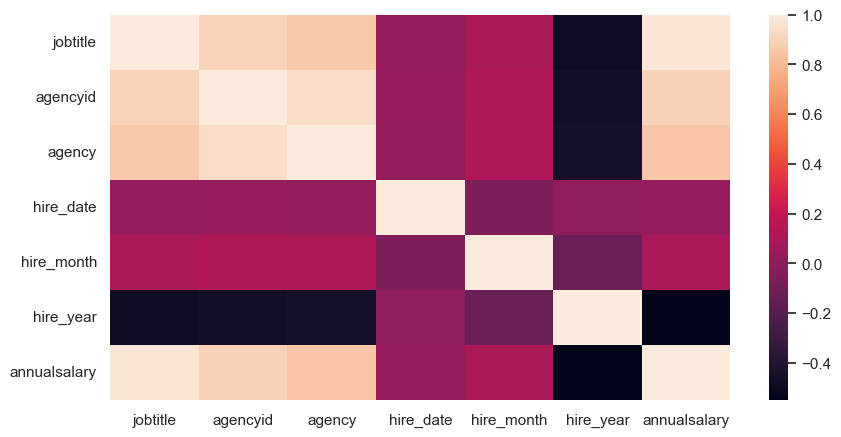

In [67]:
sns.heatmap(new_df.corr())

# Maichine learning

* spliting data 

In [68]:
y=new_df.pop('annualsalary')
x=new_df

* train_test_split

In [69]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [70]:
X_train.shape,Y_train.shape

((13226, 6), (13226,))

In [71]:
X_test.shape,Y_test.shape

((5669, 6), (5669,))

* data preprocesing
* Scaling=> Standard Scaling

In [72]:
from sklearn.preprocessing import StandardScaler
stanscale=StandardScaler()

In [73]:
X_train_scale=stanscale.fit_transform(np.array(X_train).reshape(-1,1))
y_train_scale=stanscale.fit_transform(np.array(Y_train).reshape(-1,1))

In [74]:
X_train_scale.std()

0.9999999999999999

In [75]:
X_train_scale.shape,y_train_scale.shape

((79356, 1), (13226, 1))

In [76]:
X_train.describe()

,jobtitle,agencyid,agency,hire_date,hire_month,hire_year
count,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000,13226.000000
mean,39446.710489,39467.745183,39486.800539,15.733328,6.386814,2004.138439
std,24291.669966,22261.546563,21019.953630,8.387751,2.947519,10.374848
min,0.000000,2000.000000,10234.535294,1.000000,1.000000,1952.000000
25%,11313.967200,11310.000000,11313.967200,9.000000,5.000000,1998.000000
50%,36021.633333,41595.477612,42565.513078,16.000000,6.000000,2007.000000
75%,60588.139335,59433.249359,61506.879579,22.000000,9.000000,2013.000000
max,140885.000000,109113.571429,86492.300000,31.000000,12.000000,2014.000000


* Model Building
* LinearRegression

In [77]:
from sklearn.linear_model import LinearRegression

In [78]:
model=LinearRegression()

In [79]:
model.fit(X_train,Y_train)

LinearRegression()

In [80]:
model.score(X_train,Y_train)

0.9635297577947924

In [81]:
y_pred=model.predict(X_test)

In [82]:
r2_score(Y_test,y_pred)*100

96.87226364836157

* Residul Analysis

Text(0.5, 1.0, 'Residual Analysis')

<Figure size 1000x500 with 0 Axes>

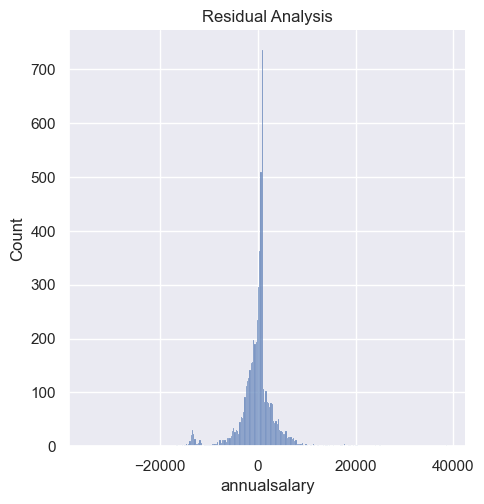

In [83]:
plt.figure(figsize=(10,5))
sns.displot(Y_test-y_pred)
plt.title("Residual Analysis")

* residual terms are normally distributed with mean=0
* Asuumption of Linear Regresion

Text(0.5, 1.0, 'Residual Analysis')

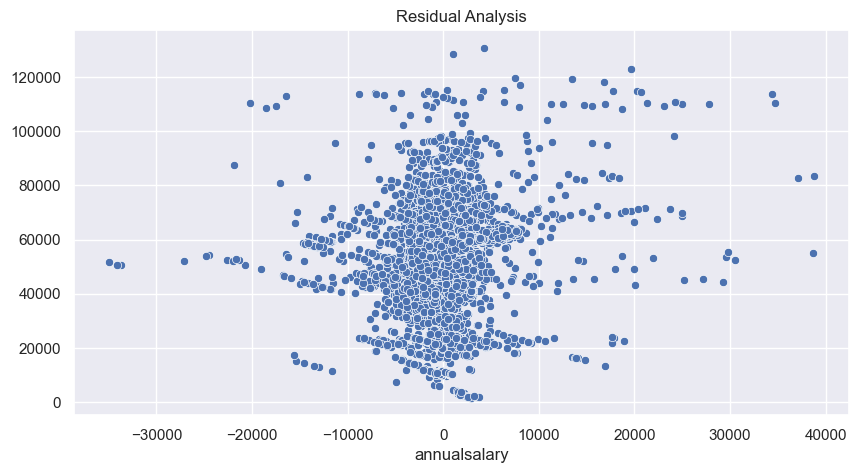

In [84]:
sns.scatterplot(x=(Y_test-y_pred) , y=y_pred)
plt.title("Residual Analysis")

* Residuals are independent of each other
* Asumptions of linear Regression

In [85]:
# coefficint and intercept of the model

print(f'coeffincte are {model.coef_}')

print(f'intercept is {model.intercept_}')

coeffincte are [ 9.03003940e-01  1.30263648e-01 -7.50410209e-02 -8.88594492e+00
 -2.36425870e+01 -2.05845658e+02]
intercept is 414482.86373126984


* Equation of the model

In [86]:
model_intercept = model.intercept_
coeff=model.coef_
equation=f"{model_intercept}"
for i in range(len(model.coef_)):
    equation +=f" + {coeff[i]}*{X_train.columns[i]}"
print(equation+" = Y_pred")

414482.86373126984 + 0.9030039401819474*jobtitle + 0.13026364823824382*agencyid + -0.07504102090234013*agency + -8.885944920086843*hire_date + -23.642586968884373*hire_month + -205.8456578581076*hire_year = Y_pred


    Observations

* JobTitle plays major roles as uit has highest coefficint value